# PYTHON-14_Очистка данных 

## 1. Введение

**Очистка данных (data cleaning)** — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).
<center>«Mусор на входе — мусор на выходе».<center>

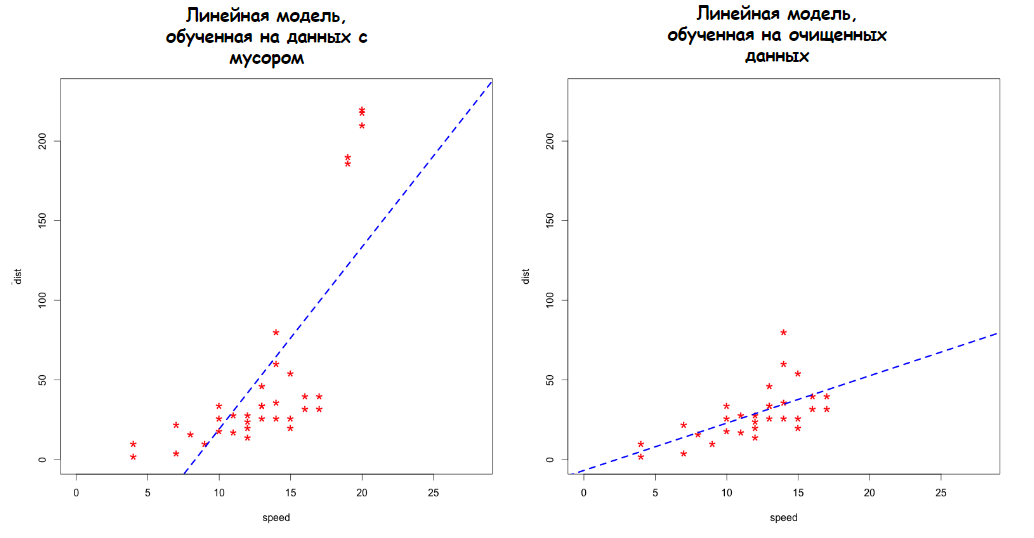

## 2. Знакомство с новыми данными: данные о квартирах от Сбера

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sber_data = pd.read_csv('data/sber_data.csv')
display(sber_data.head())
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


In [6]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

## 3. Работа с пропусками: как их обнаружить?

В *pandas* пропуски обозначаются специальным символом NaN (Not-a-Number — «не число»). 

Преобладающее большинство моделей машинного обучения не умеют обрабатывать пропуски, так как они работают только с числами. Если в данных содержится пустая ячейка таблицы, модель выдаст ошибку. 

<center>$\color{green}{\text{ПРИЧИНЫ ПОЯВЛЕНИЯ ПРОПУСКОВ В ДАННЫХ}}$</center>

- **Ошибка ввода данных.** Как правило, такая ошибка обусловлена человеческим фактором: никто не застрахован от случайного пропуска графы при заполнении данных.
- **Ошибка передачи данных.** Эта причина на сегодняшний момент возникает довольно редко: с появлением протоколов проверки выгружаемой информации потерять данные при передаче их по сети становится сложнее, но вероятность такого события ненулевая.
- **Намеренное сокрытие информации**. Одна из самых распространённых причин, особенно в социологических опросах. Дело в том, что пользователи/опрашиваемые/клиенты часто скрывают информацию о себе. Например, люди, занимающие высокие должности, могут быть связаны контрактом о неразглашении своих доходов. 
- **Прямое отсутствие информации.** Эта причина очень распространена в данных для рекомендательных систем. Представьте, что у нас есть таблицы фильмов и пользователей, которые просматривают их и ставят им оценки. Мы объединяем всю информацию в одну большую сводную таблицу: например, по строкам идут пользователи, а по столбцам — фильмы. Но вот незадача: у нас нет информации о рейтингах фильмов, которые пользователь ещё не посмотрел. В таком случае на пересечении строки с именем пользователя и столбца с названием фильма, который он ещё не смотрел, ставится пропуск. Главное несчастье состоит в том, что 99 % процентов такой таблицы — это сплошной пропуск.
- **Мошенничество.** Очень острая проблема в финансовой сфере, особенно в банковских данных. Мошенники нередко указывают ложную информацию или не указывают её вовсе.

<center>$\color{green}{\text{КАК ОБНАРУЖИТЬ ПРОПУСКИ?}}$</center>

Найти пропуски зачастую довольно просто за исключением тех случаев, когда пропуски **скрыты**: Ячейки с пропуском могут быть помечены специальным символом, например “?” или “no data”).

В библиотеке pandas специально для этого реализован метод **isnull()**. Этот метод возвращает новый *DataFrame*, в ячейках которого стоят булевы значения *True и False*. True ставится на месте, где ранее находилось значение *NaN.*

In [14]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Результат метода **isnull()** — не самый удобный метод поиска пропусков, однако он является промежуточным этапом других способов, которые мы рассмотрим далее.

<center>$\color{green}{\text{СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ}}$</center>

Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 

Для этого вычислим средний по столбцам результат метода **isnull().** Получим долю пропусков в каждом столбце.

True — 1, False — 0, при расчёте среднего получим долю 1 от общего числа строк. 
Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:

In [16]:
cols_null_percent = sber_data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
cols_with_null

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Эти соотношения дают базовое понимание, какие дальнейшие преобразования со столбцами предстоит производить. Например, уже сейчас ясно, что столбец, в котором почти половина данных пропущена, не может дать нам полезной информации при прогнозировании. Если мы попытаемся его как-то исправить, мы можем только навредить и «нафантазировать» лишнего, поэтому от него, возможно, стоит избавиться. А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие значения какими-то числами.

<center>$\color{green}{\text{СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ}}$</center>

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод **plot():**

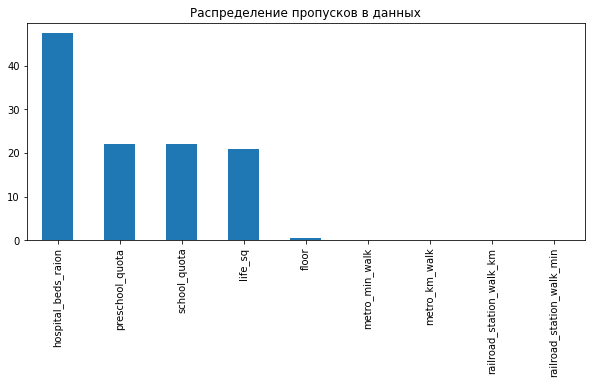

In [17]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

На диаграмме мы видим те же соотношения, что и раньше, но представленные в удобном для визуального восприятия формате. Из неё отчётливо видно, что число пропусков в столбце hospital_beds_raion превышает 45 %. Также мы видим признаки с числом пропусков близ 0.

<center>$\color{green}{\text{ТЕПЛОВАЯ КАРТА ПРОПУСКОВ }}$</center>

Для создания такой тепловой карты можно воспользоваться результатом метода **isnull().** Ячейки таблицы, в которых есть пропуск, будем отмечать $\color{yellow}{\text{жёлтым}}$ цветом, а остальные — $\color{blue}{\text{синим}}$. Для этого создадим собственную палитру цветов тепловой карты с помощью метода **color_pallete()** из библиотеки seaborn.

Index(['hospital_beds_raion', 'preschool_quota', 'school_quota', 'life_sq',
       'floor', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min'],
      dtype='object')

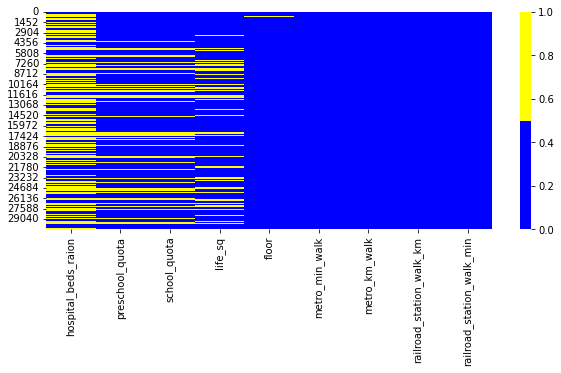

In [24]:
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
display(cols)
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако мы можем увидеть места их концентрации в таблице. Например, видно, что признаки preschool_quota и school_quota очень сильно связаны друг с другом по части пропусков: во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом).

## 4. Работа с пропусками: методы обработки

<center>$\color{green}{\text{МЕТОДЫ ОБРАБОТКИ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ}}$</center>

Не существует общего решения проблемы с отсутствующими данными. Для каждого конкретного случая приходится подбирать наиболее подходящие методы или их комбинации. При этом каждая модель уникальна и часто предполагает случайность, поэтому невозможно предсказать заранее, какая комбинация методов сработает на ваших данных лучше всего.

### ОТБРАСЫВАНИЕ ЗАПИСЕЙ И ПРИЗНАКОВ

Здесь важно правильно выбрать ось удаления: если мы избавимся от большого числа строк, то рискуем потерять важные данные, а если мы удалим столбцы, то можем потерять важные признаки.

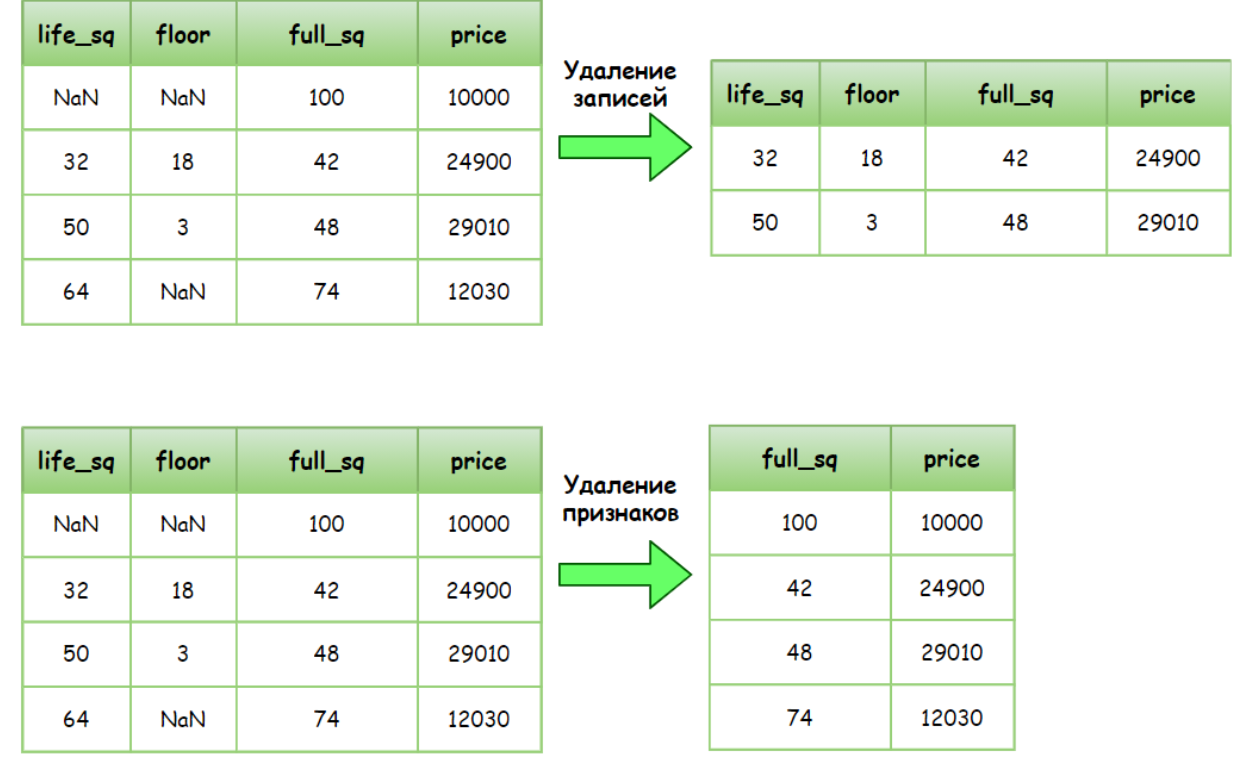

<center>Специалисты рекомендуют при использовании метода удаления придерживаться следующих правил:<br> удаляйте столбец, если число пропусков в нем более 30-40 %. В остальных случаях лучше удалять записи.<center>

Для удаления строк и столбцов будем использовать метод **dropna(),** который позволяет удалять пропуски с тонким подходом к настройке. 

Основные параметры метода:

- **axis** — ось, по которой производится удаление (по умолчанию 0 — строки).
- **how** — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; all — если во всех столбцах есть пропуски). 
- **thresh** — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем *n-2* , где *n*  — число признаков (если *axis=0*).

**Примечание**: Начиная с версии *1.5.0 Pandas* запрещает одновременно устанавливать параметры **how и thresh**. При использовании этих параметров одновременно возникает ошибка:
*TypeError: You cannot set both the how and thresh arguments at the same time*.

In [27]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [26]:
#Посмотрим на результирующее число записей:
print(drop_data.shape)

(20888, 60)


Итак, мы удалили один столбец и ⅓ всех записей для того, чтобы избавиться от пропусков. Не слишком ли это много и что с этим можно сделать?

### ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ

Чаще всего пустые места заполняют средним/медианой/модой для числовых признаков и модальным значением для категориальных признаков. 

<center>Схема метода представлена на рисунке:<center>

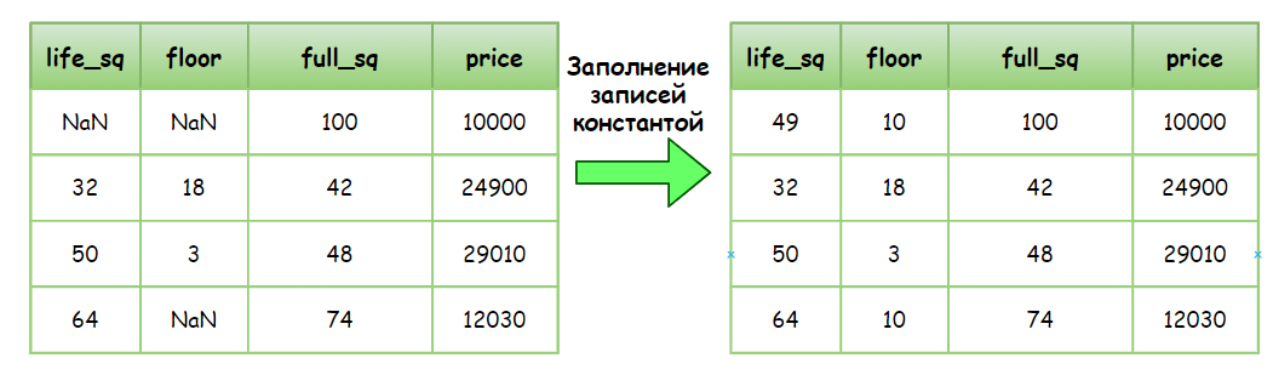

Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе метода является распределение признаков с пропусками.Давайте выведем их на экран. В *pandas* это можно сделать с помощью метода **hist():**

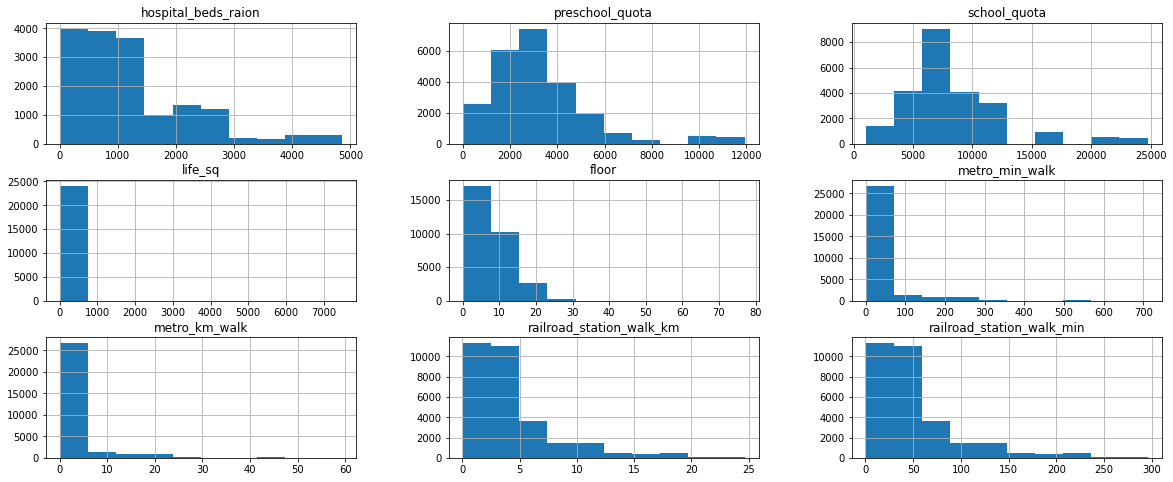

In [31]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

Несколько рекомендаций:

- Для распределений, похожих на логнормальное, где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. Поэтому предпочтительнее использовать медианное значение для таких признаков. <center>это признаки floor, metro_min_walk, metro_km_walk, railroad_station_walk_km, railroad_station_walk_min.<center>
- Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак заполняют либо **модой**, либо округляют до **целого** числа (или нужного количества знаков после запятой) среднее/медиану.
- Категориальные признаки заполняются либо модальным значением, либо, если вы хотите оставить информацию о пропуске в данных, значением 'unknown'. На наше счастье, пропусков в категориях у нас нет.
- Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных есть признак full_sq (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (life_sq) неизвестна, то она будет равна суммарной площади!

Заполнение значений осуществляется с помощью метода **fillna()**. Главный параметр метода — *value* (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего *DataFrame*, то в качестве *value* можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 

In [34]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски:
values = {
    'life_sq':fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем:
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков:
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

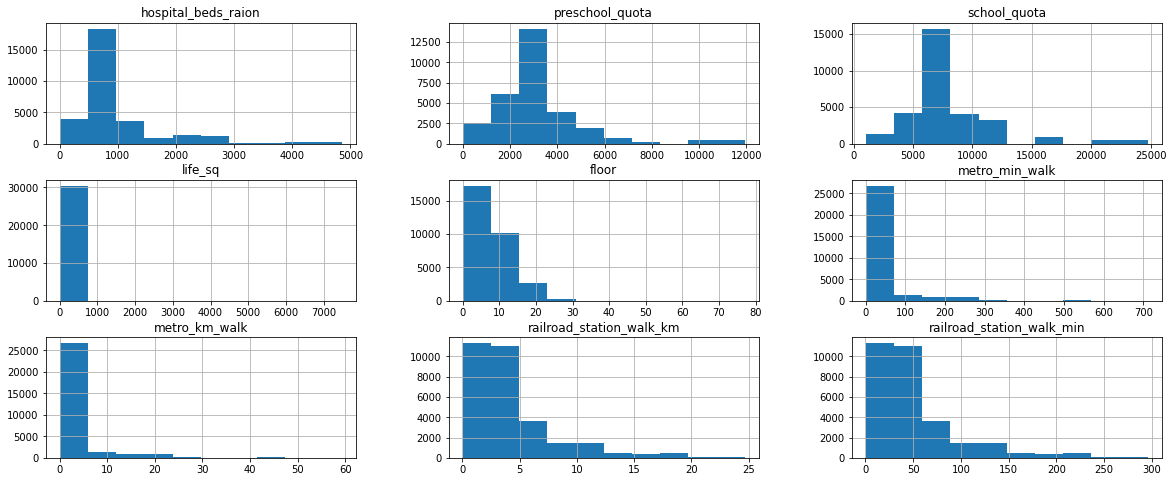

In [36]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

<center>Обратите внимание на то, как сильно изменилось распределение для признака *hospital_beds_raion*. Это связано с тем, что мы заполнили модальным значением почти 47 % общих данных. В результате мы кардинально исказили исходное распределение признака, что может плохо сказаться на модели.<center>

Недостаток метода заполнения константой состоит в том, что мы можем «нафантазировать» новые данные, которые не учитывают истинного распределения

### ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА

Давайте добавим к нашим данным признаки-индикаторы, которые будут сигнализировать о том, что в столбце на определённом месте в таблице был пропуск. Это место в столбце-индикаторе будем помечать как True. Таким образом мы пытается снизить влияние искажения признака, указав модели на места, где мы «нафантазировали» данные.

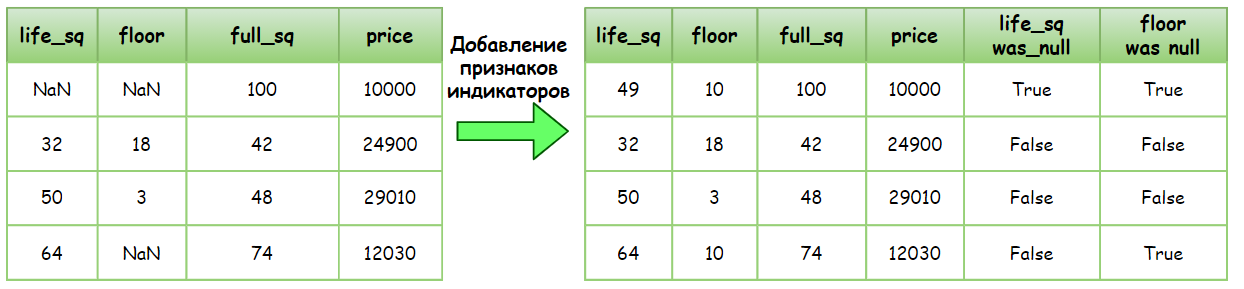

Создадим копию indicator_data исходной таблицы. В цикле пройдёмся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "was_null"), который получается из исходного с помощью применения метода **isnull().** После чего произведём обычное заполнение пропусков, которое мы совершали ранее, и выведем на экран число отсутствующих значений в столбце

In [37]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками:
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null:
    indicator_data[col+'was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски:
value = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                   0.0
full_sq                              0.0
life_sq                              0.0
floor                                0.0
sub_area                             0.0
                                    ... 
floorwas_null                        0.0
metro_min_walkwas_null               0.0
metro_km_walkwas_null                0.0
railroad_station_walk_kmwas_null     0.0
railroad_station_walk_minwas_null    0.0
Length: 70, dtype: float64

In [38]:
indicator_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raionwas_null,preschool_quotawas_null,school_quotawas_null,life_sqwas_null,floorwas_null,metro_min_walkwas_null,metro_km_walkwas_null,railroad_station_walk_kmwas_null,railroad_station_walk_minwas_null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False


<center>Метод исходит из предположения, что, если дать модели информацию о том, что в ячейке ранее была пустота, то она будет меньше доверять таким записям и меньше учитывать её в процессе обучения. Иногда такие фишки действительно работают, иногда не дают эффекта, а иногда и вовсе могут ухудшить результат обучения и затруднить процесс обучения.<center>

Когда мы добавляем признаки-индикаторы, мы повышаем размерность наших данных. Не нужно знать высшую математику, чтобы понять, что в таком случае мы увеличим размерность исходной таблицы ещё на сотню и 99 % строк этих столбцов будут заполнены нулями (False). При увеличении размерности в данных время обучения некоторых моделей растет экспоненциально — увеличив число признаков в два раза, вы увеличите время обучения в 7.38 раза! Cуществует такое понятие, как проклятие размерности. **Проклятие размерности** гласит, что, увеличивая размерность функции, мы повышаем сложность поиска этого минимума и рискуем вовсе не найти его!

### КОМБИНИРОВАНИЕ МЕТОДОВ

Наверняка вы уже догадались, что необязательно использовать один метод. Вы можете их комбинировать. Например, мы можем:
- удалить столбцы, в которых более 30 % пропусков;
- удалить записи, в которых более двух пропусков одновременно;
- заполнить оставшиеся ячейки константами.

In [41]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()
#отбрасываем столбцы с числом пропусков более 30% (100-70):
n = combine_data.shape[0]
thresh = n*0.7
combine_data = combine_data.dropna(thresh =thresh, axis=1)
#отбрасываем строки с числом пропусков более 2 в строке:
m = combine_data.shape[1]
combine_data = combine_data.dropna(thresh = m-2, axis=0)
#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values:
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [42]:
# Выведем результирующее число строк и столбцов:
print(combine_data.shape)

(26800, 60)


Вы можете придумывать свои собственные комбинации методов и использовать их для борьбы с пропусками, главное — найти баланс между потерей информации и её искажением.

**Примечание.** Стоит отметить, что предположение о том, что жилая площадь равна общей, слишком тривиально. Порассуждаем логически. Очевидно, что обычно в квартире есть хотя бы санузел, который не учитывается в жилой площади, и тогда жилая площадь будет меньше общей. Если взять соотношение жилой площади к общей площади и построить boxplot в log-масштабе, то медиана будет на около 0.6, а значение 1 (жилая = общая) не войдёт даже в последний квартиль. Поэтому в реальной задаче такая оценка соотношения площадей является не совсем корректной.

<center>$\color{green}{\text{РЕЗЮМЕ ПО МЕТОДАМ РАБОТЫ С ПРОПУСКАМИ}}$</center>

Важно держать в голове несколько рекомендаций:

- Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных. Однако если этот признак очень важен для прогнозирования, вам придётся поколдовать над ним, чтобы «заплатки», которыми вы закрываете пропуски, выглядели правдоподобно.
- Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
- Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.
- Если вам позволяют сроки вашего проекта, попробуйте несколько кардинально разных подходов работы с пропусками.

<center>$\color{green}{\text{ДРУГИЕ МЕТОДЫ ЗАПОЛНЕНИЯ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ}}$</center>

Можно предсказать пропуски с помощью **модели**. Такой подход основывается на том, что вы считаете признак с отсутствующими значениями целевым, а остальные признаки — факторами и строите модель, предсказывающую пропуски в данных. На практике часто для заполнения «дыр» в данных используют **метод ближайшего соседа (KNN) или линейную регрессию.**

Ещё один подход — **заполнение, основанное на группах**. Можно сгруппировать данные по некоторым признакам и заполнять константой, полученной в группе. Например, в наших данных для признака жилой площади можно было бы заполнять пропуски средней площадью квартир в районе.

## 5. Выбросы: почему появляются и чем опасны?

**Выброс (аномалия)** — это наблюдение, которое существенно выбивается из общего распределения и сильно отличается от других данных.

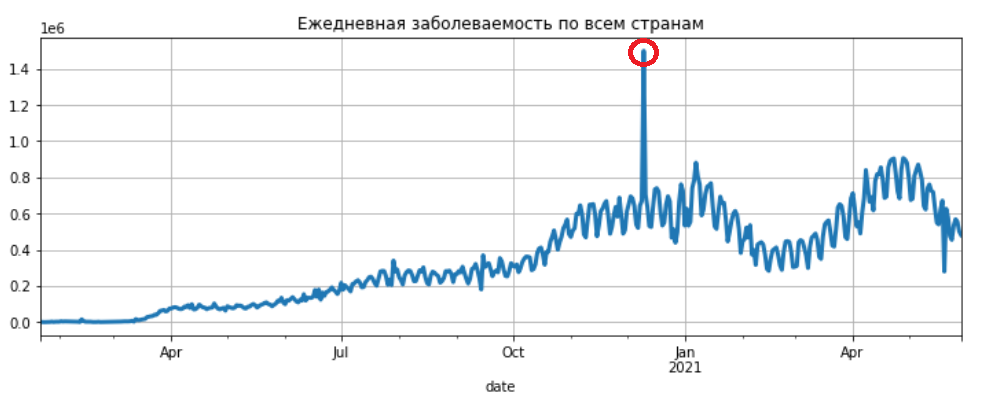

Тот самый пик в 1.4 млн заболевших в день определённо можно считать аномальным. Перед тем, как пытаться спрогнозировать такой временной ряд, рекомендуется заменить это наблюдение чем-то адекватным: например, средним между наблюдениями справа и слева от аномалии.

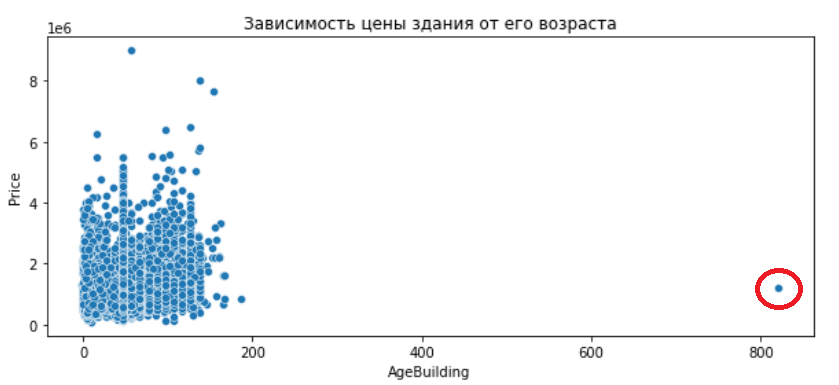

Можно отчётливо увидеть выброс: здание с возрастом более 800 лет. Учитывая, что Мельбурн, если верить Википедии, начал застраиваться только в 1830 году, такое единичное наблюдение, вероятнее всего, является ошибочным.

<center>$\color{green}{\text{ЧЕМ ОПАСНЫ ВЫБРОСЫ?}}$</center>

Выбросами могут быть как действительно реальные отклонения в данных (например, квартира в Москва-Сити за 2 млрд рублей выбивается из общего распределения, но она является вполне реальной), так и просто ошибкой (работа студента, оцененная в 8 баллов при наличии пятибалльной шкалы).

**Модели** — это математические методы, которые оперируют числами и пытаются подстроить зависимости в данных, чтобы выдать верный ответ. Когда модель сталкивается с выбросом, она пытается подстроиться и под него. В результате зависимость искажается, качество моделирования падает.

Чаще всего выбросы либо исключают из данных, либо корректируют значения на что-то правдоподобное, либо, если выбросов много, создают специальный датасет и обучают модели для них отдельно

<center>$\color{green}{\text{ПРИЧИНЫ ПОЯВЛЕНИЯ ВЫБРОСОВ}}$</center>

- Ошибка ввода данных. Как и с пропусками, здесь играет роль человеческий фактор. Ввести лишний «ноль» на клавиатуре и не заметить этого — нередкий случай.
- Ошибки отбора выборки. Когда начинающие специалисты составляют обучающую выборку для моделирования, они часто допускают ошибку, не выделив в отдельную группу часть данных. Типичный пример: смешать вместе данные об уровне жизни среднего класса, опрошенного на улице, и добавить туда людей из списка Forbes.
- Преднамеренное искажение или мошенничество. Пользователи приложения часто намеренно указывают неверные данные о себе. Например, прибавляют к своему возрасту лишнюю сотню лет, создавая головную боль дата-сайентистам.

## 6. Методы выявления выбросов

<center>$\color{green}{\text{МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА}}$</center>

Пусть у нас есть признак, по которому мы будем искать выбросы. Давайте рассчитаем его статистические показатели (минимум, максимум, среднее, квантили) и по ним попробуем определить наличие аномалий.

Сделать это можно с помощью уже знакомого вам метода describe(). Рассчитаем статистические показатели для признака жилой площади (life_sq).

In [12]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Что нам говорит метод describe()? Во-первых, у нас есть квартиры с нулевой жилой площадью. Во-вторых, в то время как 75-й квантиль равен 43, максимум превышает 7 тысяч квадратных метров (целый дворец, а не квартира!). 

Найдём число квартир с нулевой жилой площадью:

In [13]:
print(sber_data[sber_data['life_sq']==0].shape[0])

45


Таких помещений оказывается 45 штук. Это могут быть **апартаменты** — вид коммерческой недвижимости, которая юридически не является жилой площадью, но законно продаётся по ценам, сопоставимым с квартирными. Оставим их в покое.    

А теперь выведем здания с жилой площадью более 7 000 квадратных метров

In [14]:
print(sber_data[sber_data['life_sq']>7000].shape[0])

1


Выброс налицо: гигантская жилая площадь (life_sq), да ещё почти в 100 раз превышает общую площадь (full_sq).

Логичен вопрос: а много ли у нас таких квартир, у которых жилая площадь больше, чем суммарная? Давайте проверим это с помощью фильтрации:

In [15]:
outliers = sber_data[sber_data['life_sq']>sber_data['full_sq']]
print(outliers.shape[0])

37


Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными, и от них стоит избавиться. Для этого можно воспользоваться методом drop() и удалить записи по их индексам:

In [16]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


Ещё пример: давайте посмотрим на признак числа этажей (floor).

In [18]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

Снова видим подозрительную максимальную отметку в 77 этажей. Проверим все квартиры, которые находятся выше 50 этаже

In [19]:
display(sber_data[sber_data['floor']>50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Всего одна квартира в Ломоносовском районе. Пора идти в интернет в поиске [самых высоких зданий в Москве!](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B) 

Убеждаемся в том, что здания выше 70 этажей находятся на территории комплекса Москва-Сити (Пресненский район). В Ломоносовском районе таких жилых высоток нет. Получается, что данное наблюдение — выброс.

<center>$\color{green}{\text{МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)}}$</center>

Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии.

На гистограмме мы можем увидеть потенциальные выбросы как низкие далеко отстоящие от основной группы столбцов «пеньки», а на коробчатой диаграмме — точки за пределами усов.

✍️ Построим гистограмму и коробчатую диаграмму для признака полной площади (full_sq):

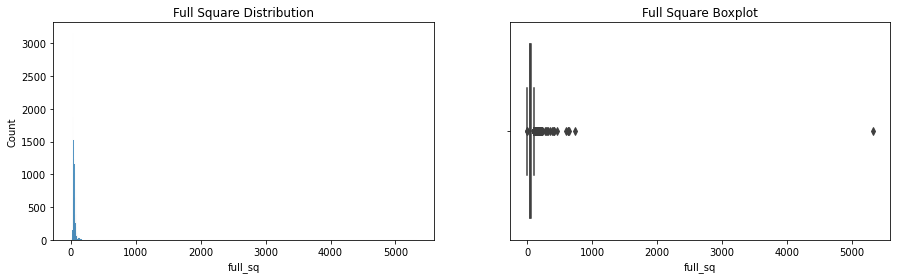

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

<center>Врага нужно знать в лицо! Запомните эти картинки: именно так выглядят типичные графики распределений с выбросами в данных. Гистограмма, реализованная в seaborn, автоматически выбирает число столбцов, необходимое для наилучшей визуализации распределения. Когда признак содержит выбивающиеся значения, число столбцов становится очень велико и в итоге получается такая «кракозябра». По этой же причине получается сплюснутая под весом выбросов коробчатая диаграмма. Она помогает более чётко увидеть потенциальные аномалии, которые находятся за пределами усов (1.5 межквартильных размаха).<center>     

Основная масса квартир имеет общую площадь менее 250 квадратных метров, и лишь несколько невзрачных наблюдений выбиваются из этого интервала. Максимальная площадь, судя по гистограмме, превышает 5 000 квадратных метров.

Визуализация помогает определить наличие выбросов. Для того чтобы их найти, можно воспользоваться **статистическими подходами**. 

Одним из таких подходов является **метод межквартильного размаха** (его еще называют **методом Тьюки**), который используется для построения коробчатой диаграммы.

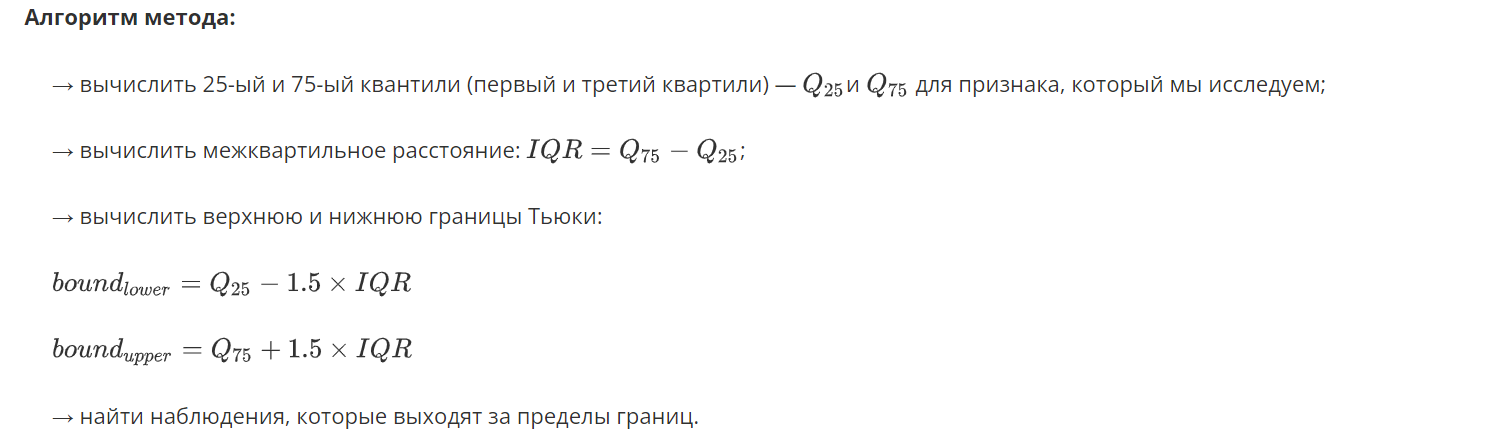

В соответствии с этим алгоритмом напишем функцию *outliers_iqr()*, которая вам может ещё не раз пригодиться в реальных задачах. Эта функция принимает на вход *DataFrame* и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет.

Квантили вычисляются с помощью метода **quantile()**. Потенциальные выбросы определяются при помощи фильтрации данных по условию выхода за пределы верхней или нижней границы.

In [26]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5) 
    upper_bound = quartile_3 + (iqr*1.5)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned

✍️ Применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов:

In [27]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму и коробчатую диаграмму на новых данных cleaned_sber_data:

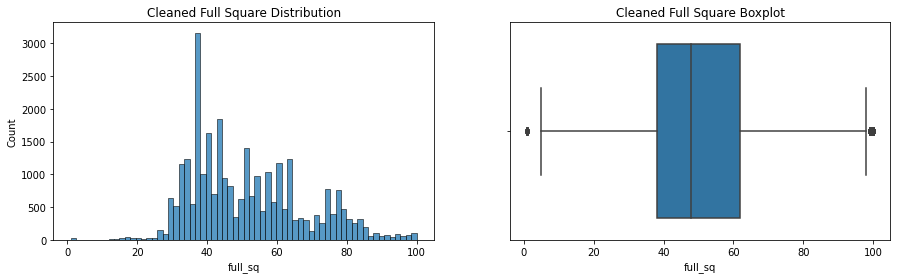

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

На первый взгляд — стерильно. Однако если присмотреться, то коробчатая диаграмма всё ещё продолжает говорить, что в данных есть одиночные выбросы с обеих сторон от границ. К тому же у нас сильно урезался диапазон жилой площади — максимальная площадь составляет около 100 кв. м. 

Причина кроется в том, что после удаления выбросов квартили рассчитываются заново по новым данным, и так оказалось, что из-за свойств распределения были снова найдены точки, которые считаются выбросами

Классический метод межквартильного размаха не учитывает особенностей распределения! Он требует, чтобы данные были распределены плюс-минус нормально (гистограмма должна быть похожа на колокол) и требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).

У нас же распределение (даже после отсечения выбросов) отличается от заявленных критериев. Оно несимметрично: правый хвост изначального распределения гораздо длиннее левого (для Москвы вполне естественны квартиры с площадью свыше 100 квадратных метров) и вовсе не колоколообразно. Попросту говоря, выбор метода поиска не оправдал себя.

Никто не говорил, что вы должны должны ограничиваться только 1.5 межквартильных размахов. Вы можете сами подбирать число размахов влево и/или вправо и таким образом отбирать выбросы, учитывая особенности ваших данных. 

In [5]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25) , x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*left) 
    upper_bound = quartile_3 + (iqr*right)
    outliers = data[(x<lower_bound)| (x>upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', 1, 6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


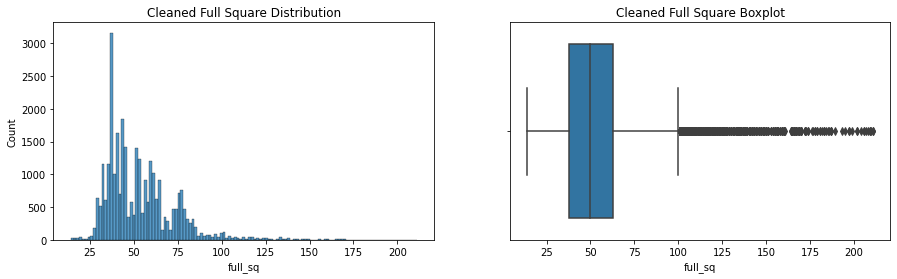

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

Согласитесь, это уже больше похоже на реальный рынок недвижимости: основная часть квартир имеет площадь в интервале от 25 до 85 кв. м, а далее частота наблюдений постепенно падает.

<center>$\color{green}{\text{МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)}}$</center>

Последний метод, который мы рассмотрим, — это метод, основанный на **правиле трёх сигм** для нормального распределения. 

**Правило трёх сигм гласит:** если распределение данных является нормальным, то 99,73 % лежат в интервале от , где   (мю) — математическое ожидание (для выборки это среднее значение), а  (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

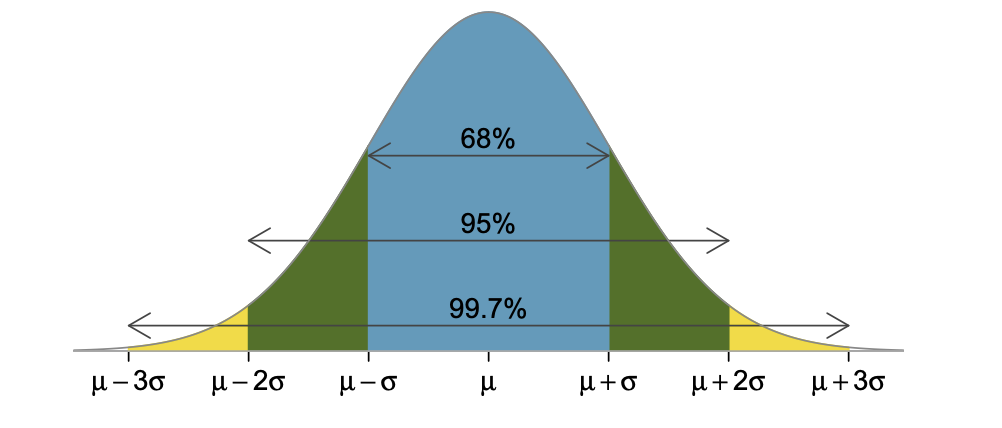

Если данные не распределены нормально, то тогда есть следующий вариант. Иногда для распределений, похожих на логнормальное, может помочь **логарифмирование**. Оно может привести исходное распределение к подобию нормального. Причем, основание логарифма может быть любым.

✍️ Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

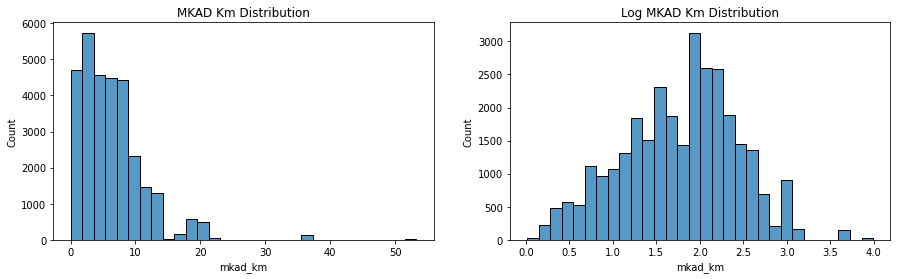

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km = np.log(sber_data['mkad_km']+1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

Левое распределение напоминает логнормальное распределение с наличием потенциальных выбросов-«пеньков», далеко отстоящих от основной массы наблюдений.

Взяв натуральный логарифм от левого распределения, мы получаем правое, которое напоминает слегка перекошенное нормальное. Слева от моды (самого высокого столбика) наблюдается чуть больше наблюдений, нежели справа. По-научному это будет звучать так: «распределение имеет левостороннюю асимметрию».

✏️ **Примечание:** Численный показатель асимметрии можно вычислить с помощью метода **skew():**

In [8]:
print(log_mkad_km.skew())

-0.14263612203024953


- Асимметрия распределения называется правосторонней, если она положительная:

As > 0

- Асимметрия распределения называется левосторонней, если она отрицательная:

As < 0

Давайте реализуем алгоритм **метода z-отклонения.** Описание алгоритма метода:

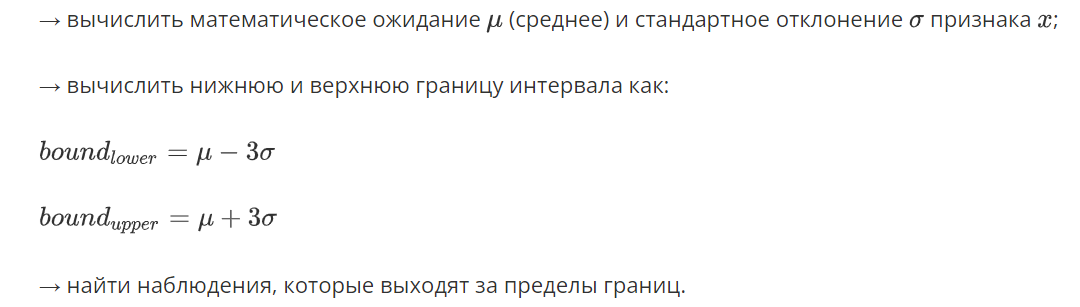

✍️ Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 

На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде.

In [20]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3*sigma
    upper_bound = mu + 3*sigma
    outliers = data[(x<lower_bound) | (x >upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
    

Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:

In [15]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


**Метод z-отклонения** нашел нам 33 потенциальных выброса по признаку расстояния до МКАД. Давайте узнаем, в каких районах (sub_area) представлены эти квартиры:

In [17]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Наши потенциальные выбросы — это квартиры из поселений «Роговское» и «Киевский». Снова обращаемся к силе интернета и «пробиваем» наших подозреваемых. Эти поселения — самые удалённые районы Москвы; первое из них — это и вовсе граница с Калужской областью.

А стоит ли считать такие наблюдения за выбросы? 

С одной стороны, метод прямо-таки говорит нам об этом, а с другой — эти наблюдения имеют право на существование, ведь они являются частью Москвы.

✏️ Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода **axvline()**. Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

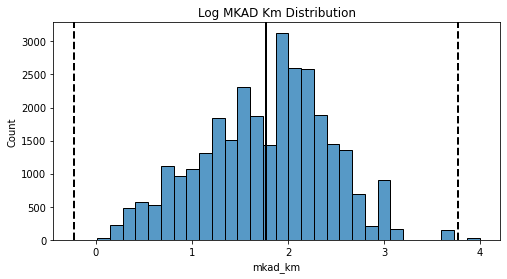

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] +1 )
histplot = sns.histplot(data=log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+3*log_mkad_km.std(), color='k', lw=2, ls='--')
histplot.axvline(log_mkad_km.mean()-3*log_mkad_km.std(), color='k', lw=2, ls='--')
histplot.set_title('Log MKAD Km Distribution');

Мы графически построили интервал метода трёх сигм поверх нашего распределения. Он показывает, какие наблюдения мы берем в интервал, а какие считаем выбросами. Легко заметить, среднее значение (жирная вертикальная линия) находится левее моды, это свойство распределений с левосторонней асимметрией. Также видны наблюдения, которые мы не захватили своим интервалом (небольшой пенек правее верхней границы) — это и есть наши квартиры из из поселений "Роговское" и "Киевский". Очевидно, что если немного (меньше чем на одну сигму) "сдвинуть" верхнюю границу вправо, мы захватим эти наблюдения.

In [ ]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x<lower_bound) | (x >upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', 3, 3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}') 

<center>$\color{green}{\text{def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    outliers = data[(x<lower_bound) | (x >upper_bound)]
    cleaned = data[(x>lower_bound) & (x<upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', 3, 3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

<center>$\color{green}{\text{РЕЗЮМЕ ПО МЕТОДАМ ПОИСКА ВЫБРОСОВ}}$</center>

Мы рассмотрели классические методы выявления аномальных данных. Как вы сами поняли, каждый из них имеет свои преимущества и недостатки.

- **Метод ручного поиска** тяжело автоматизировать, однако вы сами организовываете проверки, следите за процессом отсеивания выбросов и руководствуетесь не только статистикой, но и здравым смыслом. К тому же из всех представленных только этот метод ***способен выявить логические нестыковки*** в данных (например, общая площадь меньше жилой или число этажей более 77 в районе, где нет таких зданий). Обычно этот метод используется в комплексе с другими, чтобы удостовериться в том, что найденные данные действительно являются выбросами, и произвести логическую очистку, на которую неспособны другие методы.
- **Методы межквартильного размаха и z-отклонений** довольно ***просты в реализации и основаны на стройной математической теории***, а не на эвристиках. Но это их преимущество и недостаток. Оба метода разработаны для данных, распределённых приблизительно нормально. Проблема в том, что *далеко не всё в мире* имеет нормальное распределение. Необходимо внимательно «рыться» в данных, совершать дополнительные преобразования, чтобы привести их хотя бы к подобию нормального распределения, либо подбирать границы методов, чтобы учитывать особенности распределений. В противном случае методы начинают считать выбросами всё, что не вписывается в жёсткие границы, и вы рискуете лишиться важных данных! Учитывайте это в своей работе и всегда проверяйте результаты.

<center>$\color{green}{\text{ДРУГИЕ МЕТОДЫ ПОИСКА ВЫБРОСОВ}}$</center>

Конечно, наука о данных не ограничивается тремя методами. Скажем даже больше: в машинном обучении есть отдельная активно развивающаяся подобласть, именуемая Outliers (Anomaly) Detection. Она включает в себя большое количество методов для поиска аномалий в совершенно различных видах данных: от временных рядов до географических данных. Специалисты этой области обучают целые модели, которые помогают отыскать выбросы в данных. 

Мы рассмотрели самые простые, но очень распространённые методы поиска выбросов, главный недостаток которых состоит в том, что они основываются на информации только по одному признаку. Для глубокого поиска аномалий могут применяться методы, которые используют информацию обо всех признаках.

Например, для поиска аномалий часто используется метод кластеризации **DBSCAN**, о котором мы ещё будем говорить в модуле по кластеризации данных далее. Метод пытается объединить данные в группы (кластеры), например: квартиры низкого, среднего и премиального класса, опираясь на все признаки. Всё, что не попало ни в какой из кластеров, помечается как выброс (шум).

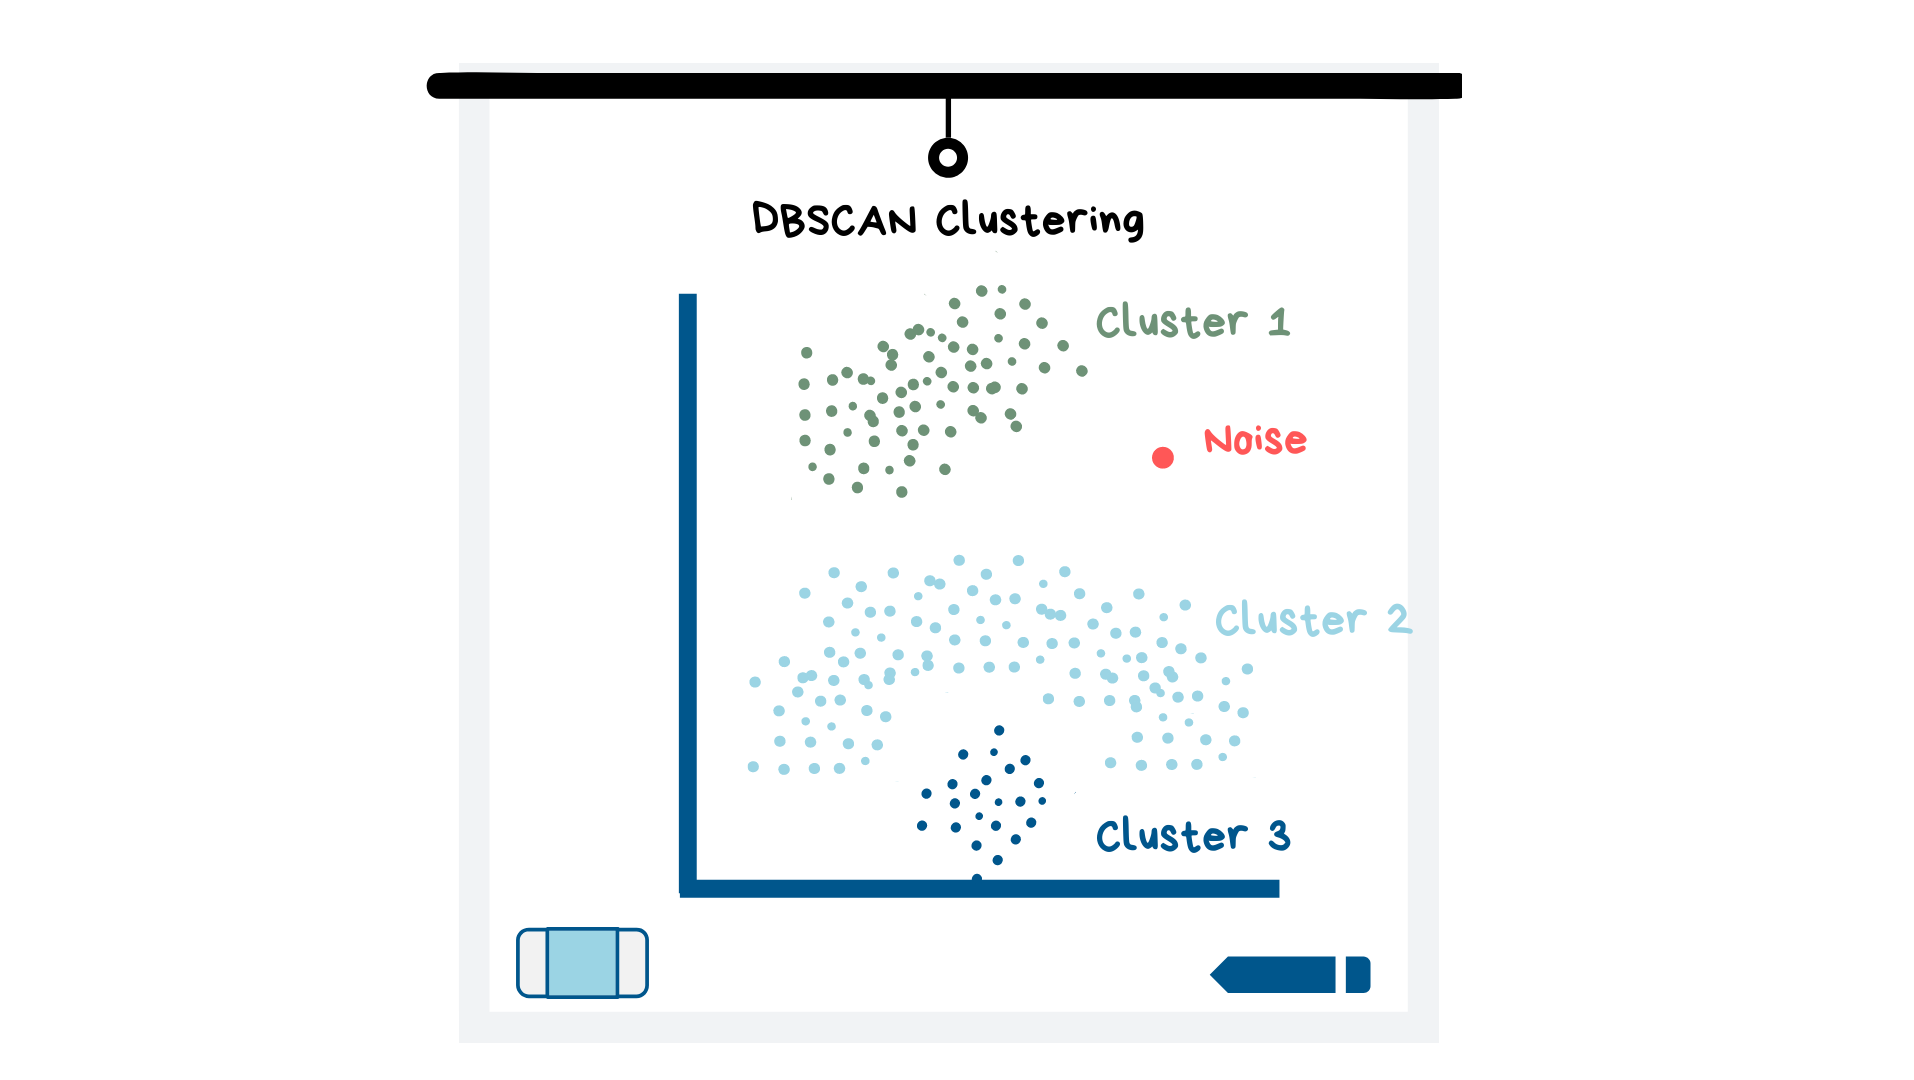

Но ситуация остаётся прежней: ни один из методов не гарантирует, что найденные наблюдения действительно являются выбросами и подлежат исключению из данных

## 7. Работа с дубликатами и неинформативными признаками

<center>$\color{green}{\text{ДУБЛИКАТЫ}}$</center>

Дубликатами называются записи, для которых значения (всех или большинства) признаков совпадают. 

### ЧЕМ ОПАСНЫ ДУБЛИКАТЫ?

Дублирующаяся информация никогда не приводит ни к чему хорошему. В Data Science одинаковые записи не несут полезной информации и искажают реальную статистику. Модель несколько раз видит одно и то же наблюдение и начинает подстраиваться под него. Если дубликатов много, это может стать большой проблемой при обучении.

### ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ ДУБЛИКАТОВ

Cравним число уникальных значений в столбце id с числом строк. Число уникальных значений вычислим с помощью метода nunique():

In [4]:
sber_data['id'].nunique() == sber_data.shape[0]

True

Столбец с *id* задаёт каждой строке свой уникальный номер, поэтому сама по себе каждая строка является уникальной, но содержимое других столбцов может повторяться.

Чтобы отследить дубликаты, можно воспользоваться методом **duplicated()**, который возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает *True*, для остальных — *False*.

У метода есть параметр **subset** — список признаков, по которым производится поиск дубликатов. По умолчанию используются все столбцы в DataFrame и ищутся полные дубликаты.

✍️ Найдём число полных дубликатов таблице sber_data. Предварительно создадим список столбцов dupl_columns, по которым будем искать совпадения (все столбцы, не включая id). 

Создадим маску дубликатов с помощью метода **duplicated()** и произведём фильтрацию. Результат заносим в переменную sber_duplicates. Выведем число строк в результирующем *DataFrame*:

In [6]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')
mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


562 строки в таблице являются полными копиями других записей. Ручной поиск совпадающих строк по 30 тысячам записей был бы практически невыполним, а с помощью pandas мы быстро, а главное, легко обнаружили дублирующиеся данные!

Чтобы избавиться от дубликатов, то легче всего воспользоваться методом **drop_duplicates()**, который удаляет повторяющиеся записи из таблицы. 

✍️ Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.

In [7]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


<center>$\color{green}{\text{НЕИНФОРМАТИВНЫЕ ПРИЗНАКИ}}$</center>

Неинформативными называются признаки, в которых большая часть строк содержит одинаковые значения (например, пол клиентов в мужском барбершопе), либо наоборот — признак, в котором для большинства записей значения уникальны (например, номер телефона клиента). 

### ЧЕМ ОПАСНЫ НЕИНФОРМАТИВНЫЕ ПРИЗНАКИ?

Такие признаки не играют роли при моделировании и лишь засоряют таблицу, увеличивая размерность данных. Они усиливают уже знакомое нам проклятие размерности, которое увеличивает время обучения модели и потенциально может снизить ее качество. 

### ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ НЕИНФОРМАТИВНЫХ ПРИЗНАКОВ

Чтобы считать признак неинформативным, нужно задать какой-то определённый порог. Часто используют пороги в 0.95 и 0.99. Это означает: признак неинформативен, если в нем 95 % (99 %) одинаковых значений или же 95 % (99 %) данных полностью уникальны.

**Алгоритм:**

→ Создаём пустой список low_information_cols, куда будем добавлять названия признаков, которые мы посчитаем неинформативными.

→ В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:

- рассчитаем top_freq — наибольшую относительную частоту с помощью метода value_counts() с параметром normalize=True. Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.

- рассчитаем nunique_ratio — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений в столбце получим с помощью метода nunique(), а размер признака — с помощью метода count(). Например, для столбца id число уникальных значений — 30471; оно же равно размеру таблицы. Поэтому результат отношения будет 1.
- сравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в список неинформативных признаков, если условие истинно.

In [10]:
low_information_cols = [] 

for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
     # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


Мы нашли шесть неинформативных признаков. Теперь можно удалить их с помощью метода **drop()**, передав результирующий список в его аргументы.

In [11]:
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55


**Примечание**. Однако всегда следует скептически относиться к результатам, которые предоставил алгоритм поиска неинформативных признаков. В противном случае можно лишиться важных данных. 

Например, в ваших данных есть признак цены акций, которая всё время меняется. В каждый момент времени её цена уникальна, то есть число уникальных значений в столбце совпадает с размером столбца. Казалось бы, по критерию информативности это кандидат на выбывание, но если мы рассматриваем задачу предсказания спроса на эти самые акции, то очевидно, что цена — это очень важный фактор, несмотря на свою уникальность. Именно цена на акции определяет спрос на них.

Могут возникнуть ситуации, когда присутствует огромная разница в частотах для каждого уникального значения в столбце, но это вовсе не значит, что признак неинформативен. Например, у нас могут быть данные о различных переводах между счетами пользователей. В этих данных может быть очень важный признак мошенничества (два возможных значения — да и нет). Как правило, соотношение между мошенниками и обычными пользователями около — 2/98 % (мошенников 1-2 %, а обычных пользователей — 98-99 %). Но стоит ли удалять данный признак из данных зависит от поставленной перед нами задачи.

### ВАЖНОСТЬ ПРИЗНАКОВ

На самом деле информативность признаков определяется не только числом уникальных значений, но и их влиянием на целевой признак (тот, который мы хотим предсказать). Это называется **важностью** признака. 

Признаки, которые обладают низкой важностью, называют **нерелевантными** признаками. 

Например, если бы в наших данных о квартирах был признак, содержащий информацию о температуре воздуха за окном, он был бы нерелевантным.